In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py
import string

from sklearn.manifold import TSNE


In [74]:
hf_en = h5py.File('/u/scr/ethanchi/relationOutputs/fi-en-8/projections.hdf5')
hf_fi = h5py.File('/u/scr/ethanchi/relationOutputs/fi-8/projections.hdf5')

en_projections = hf_en.get('projections')[()]
fi_projections = hf_fi.get('projections')[()]

hf_en.close()
hf_fi.close()

print(en_projections.shape, fi_projections.shape)


en_preds = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/pred.npy", allow_pickle=True)
fi_preds = np.load("/u/scr/ethanchi/relationOutputs/fi-8/pred.npy", allow_pickle=True)


en_sentences = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/sentences.npy", allow_pickle=True)
fi_sentences = np.load("/u/scr/ethanchi/relationOutputs/fi-8/sentences.npy", allow_pickle=True)


is_adjunct = np.vectorize(lambda x: x and ('PBArgM' in x or 'AM' in x) and '|' not in x and 'R' not in x)

en_indices = is_adjunct(en_preds)
en_projections = en_projections[en_indices, :]
en_preds = en_preds[en_indices]

fi_indices = is_adjunct(fi_preds)
fi_projections = fi_projections[fi_indices, :]
fi_preds = fi_preds[fi_indices]

clean_fi_preds = np.vectorize(lambda x: x.lstrip(string.digits + ":").replace('PBArgM_', 'fi-').upper())
fi_preds = clean_fi_preds(fi_preds)

clean_en_preds = np.vectorize(lambda x: x.lstrip(string.digits + ":").replace('AM-', 'en-').upper())
en_preds = clean_en_preds(en_preds)

print(en_preds)
print(fi_preds)

(33368, 8) (9161, 8)
['EN-MOD' 'EN-TMP' 'EN-ADV' ... 'EN-MOD' 'EN-NEG' 'EN-LOC']
['FI-LOC' 'FI-DIS' 'FI-MNR' ... 'FI-MOD' 'FI-TMP' 'FI-PNC']


In [47]:
to_trim_size = min(len(fi_preds), len(en_preds))
print(f"Trimming size is {to_trim_size}")

en_trim_indices = np.random.choice(len(en_preds), to_trim_size, replace=False)
en_projections = en_projections[en_trim_indices, :]
en_preds = en_preds[en_trim_indices]
en_sentences = en_sentences[en_trim_indices]

fi_trim_indices = np.random.choice(len(fi_preds), to_trim_size, replace=False)
fi_projections = fi_projections[fi_trim_indices, :]
fi_preds = fi_preds[fi_trim_indices]
fi_sentences = fi_sentences[fi_trim_indices]

Trimming size is 1245


In [51]:
tsne = TSNE(n_components=2, verbose=10, random_state=229)

transformed = tsne.fit_transform(np.concatenate((en_projections, fi_projections)))
en_transformed = transformed[:to_trim_size]
fi_transformed = transformed[to_trim_size:]

assert(len(en_transformed) == len(fi_transformed))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2490 samples in 0.001s...
[t-SNE] Computed neighbors for 2490 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2490
[t-SNE] Computed conditional probabilities for sample 2000 / 2490
[t-SNE] Computed conditional probabilities for sample 2490 / 2490
[t-SNE] Mean sigma: 1.666618
[t-SNE] Computed conditional probabilities in 0.127s
[t-SNE] Iteration 50: error = 79.2718811, gradient norm = 0.0743257 (50 iterations in 1.434s)
[t-SNE] Iteration 100: error = 72.6006775, gradient norm = 0.0127759 (50 iterations in 0.914s)
[t-SNE] Iteration 150: error = 72.2285309, gradient norm = 0.0067144 (50 iterations in 0.851s)
[t-SNE] Iteration 200: error = 72.1847153, gradient norm = 0.0038774 (50 iterations in 0.824s)
[t-SNE] Iteration 250: error = 72.1776733, gradient norm = 0.0007718 (50 iterations in 0.832s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.177673
[t-SNE] Iteration 300: erro

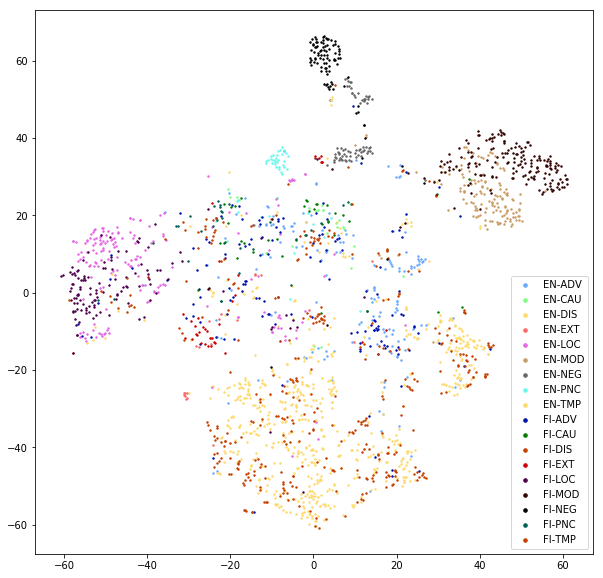

In [52]:
plt.figure(figsize=(10, 10))

xkcd_colors = ['xkcd:teal', 'xkcd:orange', 'xkcd:yellow', 'xkcd:magenta', 'xkcd:sky blue', 'xkcd:grey', 'xkcd:lime green', 'xkcd:light purple', 'xkcd:violet', 'xkcd:dark green', 'xkcd:turquoise', 'xkcd:lavender', 'xkcd:dark blue', 'xkcd:tan', 'xkcd:cyan', 'xkcd:aqua', 'xkcd:forest green', 'xkcd:mauve', 'xkcd:dark purple', 'xkcd:bright green', 'xkcd:maroon', 'xkcd:olive', 'xkcd:salmon', 'xkcd:beige', 'xkcd:royal blue', 'xkcd:navy blue', 'xkcd:lilac', 'xkcd:black', 'xkcd:hot pink', 'xkcd:light brown', 'xkcd:pale green', 'xkcd:peach', 'xkcd:olive green', 'xkcd:dark pink']
base_colors = ['xkcd:blue', 'xkcd:green', 'xkcd:orange', 'red', 'purple', 'xkcd:brown', 'xkcd:black'] + xkcd_colors
brighten = lambda x: [min(1, y + 0.4) for y in x]
darken = lambda x: [max(0, y - 0.2) for y in x]
en_colors = [brighten(matplotlib.colors.to_rgba(x)) for x in base_colors]
fi_colors = [darken(matplotlib.colors.to_rgba(x)) for x in base_colors]


preds_to_graph = ['ADV', 'CAU', 'DIS', 'EXT', 'LOC', 'MOD', 'NEG', 'PNC', 'TMP']
en_preds_graph = ['EN-' + x for x in preds_to_graph]
fi_preds_graph = ['FI-' + x for x in preds_to_graph]

for pred, color in zip(en_preds_graph, en_colors):
  plt.scatter(en_transformed[en_preds == pred][:, 0], en_transformed[en_preds == pred][:, 1], s=2, alpha=1, label=pred, color=color)
  
for pred, color in zip(fi_preds_graph, fi_colors):
  plt.scatter(fi_transformed[fi_preds == pred][:, 0], fi_transformed[fi_preds == pred][:, 1], s=2, alpha=1, label=pred, color=color)
  
plt.legend(markerscale=2.5, prop={'size': 10})
plt.show()

In [55]:
en_sentences = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/sentences.npy", allow_pickle=True)[en_indices][en_trim_indices]
en_idxs = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/idxs.npy", allow_pickle=True)[en_indices][en_trim_indices]
en_words = np.load("/u/scr/ethanchi/relationOutputs/fi-en-8/words.npy", allow_pickle=True)[en_indices][en_trim_indices]

fi_sentences = np.load("/u/scr/ethanchi/relationOutputs/fi-8/sentences.npy", allow_pickle=True)[fi_indices][fi_trim_indices]
fi_idxs = np.load("/u/scr/ethanchi/relationOutputs/fi-8/idxs.npy", allow_pickle=True)[fi_indices][fi_trim_indices]
fi_words = np.load("/u/scr/ethanchi/relationOutputs/fi-8/words.npy", allow_pickle=True)[fi_indices][fi_trim_indices]

In [69]:
out = np.stack((transformed[:, 0],
                transformed[:, 1],
                np.concatenate((en_preds, fi_preds)),
                np.concatenate((en_sentences, fi_sentences)),
                np.concatenate((en_idxs, fi_idxs)),
                np.concatenate((en_words, fi_words)))).T

header = "x0\tx1\tlabel\tsentence\tidx\tword"
np.savetxt('/sailhome/ethanchi/structural-probes/visualizations/fi-en-srl.tsv', out, fmt="%s", header=header, comments="", delimiter="\t")